In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 192ms/step


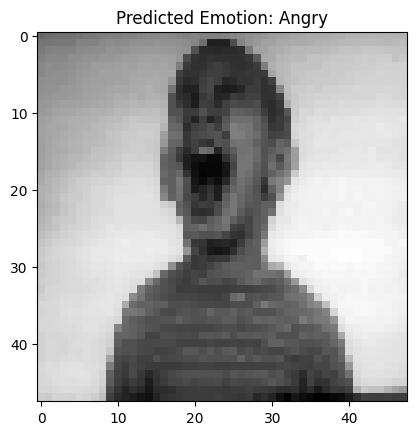

Hasil prediksi probabilitas per emosi:
Angry: 31.55%
Disgust: 0.24%
Fear: 6.82%
Happy: 14.02%
Neutral: 10.51%
Sad: 28.55%
Surprise: 8.30%


In [30]:
opDict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      const context = canvas.getContext('2d');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      context.drawImage(video, 0, 0, canvas.width, canvas.height);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Memuat model
from keras.models import load_model
model = load_model("/content/gdrive/MyDrive/Deeplearning/deteksi ekpresi muka/model_weights.h5")

# Mengambil gambar dari kamera
img_path = take_photo()
img = image.load_img(img_path, target_size=(48, 48), grayscale=True) # Sesuaikan dengan format masukan model
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0

# Memprediksi ekspresi wajah
hasil1 = model.predict(img)
emotion_label = opDict[np.argmax(hasil1)]

# Menampilkan gambar dan hasil prediksi
plt.imshow(img[0].reshape(48, 48), cmap='gray')
plt.title(f'Predicted Emotion: {emotion_label}')
plt.show()

print("Hasil prediksi probabilitas per emosi:")
for i, prob in enumerate(hasil1[0]):
    print(f"{opDict[i]}: {prob * 100:.2f}%")